Title of Final Project: Child Mind Institute - Detect Sleep States

Section: 52745


Student Name: Thomas Wynn

Student UT EID: ttw483

Date: 10/30/23


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import plotly.express as px

import seaborn as sns
from IPython.display import Markdown
import gc

train_events_path = "/Users/thomaswynn/Desktop/sleep_kaggle/child-mind-institute-detect-sleep-states/train_events.csv"
train_series_path = "/Users/thomaswynn/Desktop/sleep_kaggle/child-mind-institute-detect-sleep-states/train_series.parquet"



In [19]:
print(pd.__version__)

2.1.3


In [33]:
# Memory reduction for train_series
#The following function has been taken from the notebook
# https://www.kaggle.com/code/renatoreggiani/zzzs-feat-eng-ideas-60-memory-reduction?scriptVersionId=143987308

from pandas.api.types import is_datetime64_ns_dtype
import gc

# import warnings
# warnings.filterwarnings("ignore")

def reduce_mem_usage(df):
    
    """ 
    Iterate through all numeric columns of a dataframe and modify the data type
    to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        if col == 'timestamp' or col == 'date' or col == 'time' : continue
        col_type = df[col].dtype
        if col_type != object and not is_datetime64_ns_dtype(df[col]):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    df['series_id'] = df['series_id'].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    decrease = 100 * (start_mem - end_mem) / start_mem
    print(f'Decreased by {decrease:.2f}%')
    
    return df

In [27]:
## create a list 'dt_transforms' with transformations 
## to be applied to a timestamp column in the data
dt_transforms = [
   pl.col('timestamp').str.to_datetime(), 
   (pl.col('timestamp').str.to_datetime().dt.date()).alias('date'), 
   pl.col('timestamp').str.to_datetime().dt.time().alias('time')
]

trn_series = (
   pl.scan_parquet(train_series_path)
   .with_columns((dt_transforms))
   .collect()
   .to_pandas()
)

trn_events = (
   pl.scan_csv(train_events_path)
   .with_columns((dt_transforms))
   .collect()
   .to_pandas()
)

# # download test_series data
# tst_series = (
#    pl.scan_parquet('/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet')
#    .with_columns((dt_transforms))
#    .collect()
#    .to_pandas()
# )

reduce_mem_usage(trn_series)

Memory usage of dataframe is 5368.84 MB
object
uint32


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [37]:
for col in trn_series.columns :
    print(col)

series_id
step
timestamp
anglez
enmo
date
time


In [40]:
print(is_datetime64_ns_dtype((trn_series.time[0])))

False


In [34]:
reduce_mem_usage(trn_series)

Memory usage of dataframe is 5368.84 MB
object
uint32
datetime64[us, UTC]


TypeError: '>' not supported between instances of 'Timestamp' and 'numpy.float16'

In [ ]:
df = train_series.iloc[::2 , :]
df

,series_id,step,timestamp,anglez,enmo,date,time
0,038441c925bb,0.0,2018-08-14 19:30:00+00:00,2.636700,0.0217,2018-08-14,19:30:00
2,038441c925bb,2.0,2018-08-14 19:30:10+00:00,2.637000,0.0216,2018-08-14,19:30:10
4,038441c925bb,4.0,2018-08-14 19:30:20+00:00,2.636800,0.0215,2018-08-14,19:30:20
6,038441c925bb,6.0,2018-08-14 19:30:30+00:00,2.636700,0.0217,2018-08-14,19:30:30
8,038441c925bb,8.0,2018-08-14 19:30:40+00:00,2.798000,0.0223,2018-08-14,19:30:40
...,...,...,...,...,...,...,...
127946330,fe90110788d2,592370.0,2017-09-08 04:14:10+00:00,-27.919701,0.0205,2017-09-08,04:14:10
127946332,fe90110788d2,592372.0,2017-09-08 04:14:20+00:00,-27.647301,0.0207,2017-09-08,04:14:20
127946334,fe90110788d2,592374.0,2017-09-08 04:14:30+00:00,-27.450001,0.0203,2017-09-08,04:14:30
127946336,fe90110788d2,592376.0,2017-09-08 04:14:40+00:00,-27.032499,0.0233,2017-09-08,04:14:40


In [ ]:

df = df.iloc[::2 , :]
df

,series_id,step,timestamp,anglez,enmo,date,time
0,038441c925bb,0.0,2018-08-14 19:30:00+00:00,2.636700,0.0217,2018-08-14,19:30:00
4,038441c925bb,4.0,2018-08-14 19:30:20+00:00,2.636800,0.0215,2018-08-14,19:30:20
8,038441c925bb,8.0,2018-08-14 19:30:40+00:00,2.798000,0.0223,2018-08-14,19:30:40
12,038441c925bb,12.0,2018-08-14 19:31:00+00:00,2.412900,0.0218,2018-08-14,19:31:00
16,038441c925bb,16.0,2018-08-14 19:31:20+00:00,2.412900,0.0215,2018-08-14,19:31:20
...,...,...,...,...,...,...,...
127946320,fe90110788d2,592360.0,2017-09-08 04:13:20+00:00,-30.414600,0.0195,2017-09-08,04:13:20
127946324,fe90110788d2,592364.0,2017-09-08 04:13:40+00:00,-30.005699,0.0384,2017-09-08,04:13:40
127946328,fe90110788d2,592368.0,2017-09-08 04:14:00+00:00,-27.987900,0.0196,2017-09-08,04:14:00
127946332,fe90110788d2,592372.0,2017-09-08 04:14:20+00:00,-27.647301,0.0207,2017-09-08,04:14:20


In [ ]:
no_nan_series = train_events.groupby('series_id')['step'].apply(lambda x: x.isnull().any())
no_nan_series.value_counts()

True     240
False     37
Name: step, dtype: int64

In [ ]:
no_nan_series = no_nan_series.drop('31011ade7c0a') # incomplete events data
no_nan_series = no_nan_series.drop('a596ad0b82aa') # incomplete events data

let remove these.

In [ ]:
no_nan_series = no_nan_series[~no_nan_series].index.tolist()
no_nan_series

['08db4255286f',
 '0a96f4993bd7',
 '0cfc06c129cc',
 '1087d7b0ff2e',
 '10f8bc1f7b07',
 '18b61dd5aae8',
 '29c75c018220',
 '3452b878e596',
 '349c5562ee2c',
 '3664fe9233f9',
 '483d6545417f',
 '55a47ff9dc8a',
 '5acc9d63b5fd',
 '5f94bb3e1bed',
 '655f19eabf1e',
 '67f5fc60e494',
 '72bbd1ac3edf',
 '76237b9406d5',
 '7822ee8fe3ec',
 '89bd631d1769',
 '8e32047cbc1f',
 '939932f1822d',
 '9ee455e4770d',
 'a9a2f7fac455',
 'a9e5f5314bcb',
 'af91d9a50547',
 'b364205aba43',
 'c535634d7dcd',
 'c6788e579967',
 'c68260cc9e8f',
 'ca730dbf521d',
 'd150801f3145',
 'd25e479ecbb7',
 'd515236bdeec',
 'd5e47b94477e']

## In this function, we are combining train_series with train_events to create a binary dataset, for a given series ID. Time points where the individual are asleep are labeled 1 and awake, 0.

In [ ]:
def get_train_series(series): # takes in a series ID and returns
    train_series = pd.read_parquet(train_series_path, filters=[('series_id','==',series)])
    train_events = pd.read_csv(train_events_path).query('series_id == @series')
    
    train_events = train_events.dropna()
    train_events["step"]  = train_events["step"].astype("int")
    train_events["awake"] = train_events["event"].replace({"onset":1,"wakeup":0})

    train = pd.merge(train_series, train_events[['step','awake']], on='step', how='left')
    train["awake"] = train["awake"].bfill(axis ='rows')

    train['awake'] = train['awake'].fillna(1) # awake
    train["awake"] = train["awake"].astype("int")
    return(train)

### Lets visualize this...

In [ ]:
smaller_train_data = []

for series_id in no_nan_series:
    train = get_train_series(series_id)
    smaller_train_data.append(train)

In [ ]:
series_size_dict = {id : size for (id,size) in zip([dataframe.series_id.unique()[0] for dataframe in smaller_train_data], [len(dataframe) for dataframe in smaller_train_data])}

In [ ]:
index = 0
for series_id in no_nan_series : 
    if series_id == "349c5562ee2c":
        print(index)
        break
    else : index += 1
min(series_size_dict, key = series_size_dict.get)
    

8


'349c5562ee2c'

In [ ]:
min(series_size_dict, key = series_size_dict.get)

'349c5562ee2c'

In [ ]:
smaller_train_data[2]

,series_id,step,timestamp,anglez,enmo,awake
0,0cfc06c129cc,0,2018-12-17T11:45:00-0500,-76.697998,0.0419,1
1,0cfc06c129cc,1,2018-12-17T11:45:05-0500,-76.774902,0.0417,1
2,0cfc06c129cc,2,2018-12-17T11:45:10-0500,-76.758400,0.0415,1
3,0cfc06c129cc,3,2018-12-17T11:45:15-0500,-76.698997,0.0412,1
4,0cfc06c129cc,4,2018-12-17T11:45:20-0500,-76.713203,0.0416,1
...,...,...,...,...,...,...
384655,0cfc06c129cc,384655,2019-01-08T17:59:35-0500,-1.653200,0.0790,1
384656,0cfc06c129cc,384656,2019-01-08T17:59:40-0500,-3.439000,0.0868,1
384657,0cfc06c129cc,384657,2019-01-08T17:59:45-0500,-5.517300,0.0744,1
384658,0cfc06c129cc,384658,2019-01-08T17:59:50-0500,-2.471600,0.0523,1


In [ ]:
from matplotlib.widgets import Slider
%matplotlib inline
data = smaller_train_data[-8]
series_id = data.series_id.unique()[0]
series_events = train_events[train_events.series_id == series_id]
wake_steps = series_events[series_events.event == 'wakeup'].timestamp
onset_steps = series_events[series_events.event == 'onset'].timestamp

awake_changes = data.awake.diff()


In [ ]:
data.index = pd.to_datetime(data['timestamp'])

enmo_df = data.enmo.resample("60S").mean().to_frame(name = 'enmo')
anglez_df = data.anglez.resample("60S").mean().to_frame(name = 'anglez')

awake_enmo = data.awake.resample("60S").mean()
awake_anglez = data.awake.resample("60S").mean()

awake_enmo = awake_enmo.reset_index()
awake_anglez = awake_anglez.reset_index()

awake_enmo = awake_enmo.drop('timestamp', axis = 1)
awake_anglez = awake_anglez.drop('timestamp', axis = 1)

enmo_df = pd.concat((enmo_df.reset_index(), awake_enmo), axis = 1)
anglez_df = pd.concat((anglez_df.reset_index(), awake_anglez), axis = 1)


def makezero(value) : 
    if value < 1:
        return 0
    else : return 1
        
enmo_df.awake = enmo_df.awake.apply(lambda val : makezero(val))
anglez_df.awake = anglez_df.awake.apply(lambda val : makezero(val))
enmo_df

,timestamp,enmo,awake
0,2019-06-27 12:15:00-04:00,0.000000,1
1,2019-06-27 12:16:00-04:00,0.000000,1
2,2019-06-27 12:17:00-04:00,0.000000,1
3,2019-06-27 12:18:00-04:00,0.016642,1
4,2019-06-27 12:19:00-04:00,0.008208,1
...,...,...,...
11335,2019-07-05 09:10:00-04:00,0.053925,1
11336,2019-07-05 09:11:00-04:00,0.209942,1
11337,2019-07-05 09:12:00-04:00,0.196275,1
11338,2019-07-05 09:13:00-04:00,0.059317,1


In [ ]:
wake_steps_df

NameError: name 'wake_steps_df' is not defined

In [ ]:
import altair as alt
alt.data_transformers.disable_max_rows()
wake_steps_df = wake_steps.to_frame(name='timestamp')
onset_steps_df = onset_steps.to_frame(name='timestamp')


interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(enmo_df.reset_index()).mark_line().encode(
    x = 'timestamp:T',
    y = 'enmo:Q',
    color = alt.Color('awake:N')
).properties (
    width = 1500,
    height = 250
)

base2 = alt.Chart(anglez_df.reset_index()).mark_line().encode(
    x = 'timestamp:T',
    y = 'anglez:Q',
    color = alt.Color('awake:N')
).properties (
    width = 1500,
    height = 250
)

rule1 = alt.Chart(wake_steps_df).mark_rule(
    color="green",
    strokeWidth=3,
    strokeDash=[20, 1]
).encode(
    x="timestamp:T",
)

rule2 = alt.Chart(onset_steps_df).mark_rule(
    color="red",
    strokeWidth=3,
    strokeDash=[20, 1]
).encode(
    x="timestamp:T",
)


top = base + rule1 + rule2
top2 = base2 + rule1 + rule2

chart = top.encode(
    x=alt.X('timestamp:T', scale=alt.Scale(domain=interval))
)

chart2 = top2.encode(
    x=alt.X('timestamp:T', scale=alt.Scale(domain=interval))
)

view = base.add_selection(
    interval
).properties (
    height = 50,
    width = 1500
)

(chart2 & chart & view).configure_axis(
    grid=False
)


NameError: name 'wake_steps' is not defined

----------------

In [ ]:
import matplotlib.dates as mdates
my_colors = ["#f79256", "#fbd1a2", "#7dcfb6", "#00b2ca"]
train_events["time"] = train_events.timestamp.dt.time


df = train_events.copy()
df.time = pd.to_datetime(df.time, format='%H:%M:%S')
df.set_index(['time'],inplace=True)
df.event = df.event.astype(str)

df.event = df.event.astype(str)

def change_event_numeric(event):
    if event == "onset":
        return 1
    if event == "wakeup":
        return 2
    
df.event = df.event.apply(change_event_numeric)

def jitter(values,j= 0.01):
    return values + np.random.normal(j,0.05,values.shape)


# Create a scatter plot
fig = px.scatter(
    x=df.index,
    y=jitter(df["event"], 0.01),
    color=df["event"],
    size=df["event"] + 4,
    color_continuous_scale = px.colors.qualitative.D3
)

# Set the title and axis labels
fig.update_layout(
    title="Times for onset & wakeup",
    xaxis_title="time",
    yaxis_title="event type",
    width = 1500,
    height = 500,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2],
        ticktext = ['Onset of Asleep', 'Wake up']
    )
)

fig.update(layout_coloraxis_showscale=False)
fig.update_xaxes(showline=False, linewidth=0, linecolor='black', gridcolor='black', gridwidth= 10)
fig.update_yaxes(showline=False, linewidth=0, linecolor='black', gridcolor='black', gridwidth= 4)

# Rotate the x-axis ticks
fig.update_xaxes(tickangle=45)
fig.show()


-----------------

In [ ]:
def fft_signal_clean(signal, filter_percent=99.7, f=0.2, show_plot=False, y_min=0, y_max=1, L_min_idx=0, L_max_idx=-1):
    """
    Denoising signal using Fast Fourier Transformation
    Adapted from: https://www.youtube.com/watch?v=s2K1JfNR7Sc
    
    All errors are mine.
    """
    t = np.arange(0,1,f)
    
    # Get signal length
    n = len(signal)
    
    # Compute the FFT
    fhat = np.fft.fft(signal, n)
    
    # Compute Power Spectrum
    PSD = fhat * np.conj(fhat) / n
    print(PSD)
    # Create x-axis of frequencies
    freq = (1 / (f * n)) * np.arange(n)
    
    PSD_filter = np.percentile(PSD.real, filter_percent)
    
    # For graphing
    if show_plot:
        L = np.arange(1, np.floor(n/2), dtype='int')
        fig,axs = plt.subplots(1,1)
        plt.sca(axs)
        plt.plot(freq[L], PSD[L], color='c', linewidth=2, label='Noisy')
        axs.axhline(
            y=PSD_filter,
            color='red'
        )
        ## Limits on y-axis
        plt.ylim(y_min, y_max)
        
        ## Limits on x-axis
        plt.xlim(freq[L[L_min_idx]]-0.1, freq[L[L_max_idx]]+0.1)
        plt.legend()
        plt.title("PSD")
        plt.show()
    
    indices = PSD >= PSD_filter
    
    # For graphing
    if show_plot:
        PSD_clean = PSD * indices
    
    fhat = fhat * indices
    
    # Compute inverse FFT
    signal_clean = np.fft.ifft(fhat)
    
    return signal_clean.real

In [ ]:
def plot_series(series, s_lbls, column='enmo'):
    """
    Plot the selected column and the accompanying events
    """
    # assert column in s.columns, "Invalid column."
    
    ymin = series[column].min()
    ymax = series[column].max()
    
    color = '#F8C471'

    color_onset = '#196F3D'
    color_wakeup = '#943126'

    fig, ax = plt.subplots(figsize=(20, 6))

    ax.plot(series.step, series[column], color=color)

    # Apply label
    for r in s_lbls[['event', 'step']].itertuples():
        ax.axvline(x=r.step,
                   ymin=min(0, ymin),
                   ymax=max(1, ymax),
                   linewidth=2.,
                   linestyle='--',
                   color=color_onset if r.event == 'onset' else color_wakeup)

    ax.set_xlabel('Step')
    ax.set_ylabel(column, color=color, fontsize = 14)
    fig.suptitle(f'{column} for {series.series_id.iloc[0]}', fontsize = 20)
    fig.autofmt_xdate()
    return fig


In [ ]:
series_id = train_events.series_id[0]

s = train_series.query(f"`series_id`=='{series_id}'")
s_lbls = train_events.query(f"`series_id`=='{series_id}'")

In [ ]:
#test_series['anglez_norm'] = tst_series['anglez'] / 90.
train_series['anglez_norm'] = train_series['anglez'] / 90.

In [ ]:
series_id

'038441c925bb'

In [ ]:
s = smaller_train_data[2]

In [ ]:
s

,series_id,step,timestamp,anglez,enmo,awake,enmo_clean
0,0cfc06c129cc,0,2018-12-17T11:45:00-0500,-76.697998,0.0419,1,0.058063
1,0cfc06c129cc,1,2018-12-17T11:45:05-0500,-76.774902,0.0417,1,0.058052
2,0cfc06c129cc,2,2018-12-17T11:45:10-0500,-76.758400,0.0415,1,0.058040
3,0cfc06c129cc,3,2018-12-17T11:45:15-0500,-76.698997,0.0412,1,0.058029
4,0cfc06c129cc,4,2018-12-17T11:45:20-0500,-76.713203,0.0416,1,0.058018
...,...,...,...,...,...,...,...
384655,0cfc06c129cc,384655,2019-01-08T17:59:35-0500,-1.653200,0.0790,1,0.058120
384656,0cfc06c129cc,384656,2019-01-08T17:59:40-0500,-3.439000,0.0868,1,0.058109
384657,0cfc06c129cc,384657,2019-01-08T17:59:45-0500,-5.517300,0.0744,1,0.058097
384658,0cfc06c129cc,384658,2019-01-08T17:59:50-0500,-2.471600,0.0523,1,0.058086


In [ ]:
filter_percentages = [0, 50, 75, 99.7, 99.9, 99.95, 99.99, 99.999]
s['anglez_norm'] = s['anglez'] / 90.
for i in  range(len(filter_percentages) ) : 
    s[f'enmo_clean{i}'] = fft_signal_clean(s.enmo.values, filter_percent=filter_percentages[i], show_plot=False, y_min=0, y_max=2, L_min_idx=0, L_max_idx=50);
    s[f'anglez_clean{i}'] = fft_signal_clean(s.anglez_norm.values, filter_percent=filter_percentages[i], show_plot=False, y_min=0, y_max=2, L_min_idx=0, L_max_idx=50);


[8.69010583e+02-3.36003147e-32j 5.03300845e+00-1.25196953e-16j
 8.50831144e-02+7.18758972e-19j ... 5.17380664e-01+9.38226473e-19j
 8.50831144e-02+5.15096212e-19j 5.03300845e+00+8.92445897e-17j]
[4266.71130351-6.72006295e-31j 1023.47529244+1.20737674e-14j
  575.31768603-9.16459453e-15j ...  572.130573  +4.53928020e-15j
  575.31768603-5.62705598e-15j 1023.47529244+1.20802583e-14j]
[8.69010583e+02-3.36003147e-32j 5.03300845e+00-1.25196953e-16j
 8.50831144e-02+7.18758972e-19j ... 5.17380664e-01+9.38226473e-19j
 8.50831144e-02+5.15096212e-19j 5.03300845e+00+8.92445897e-17j]
[4266.71130351-6.72006295e-31j 1023.47529244+1.20737674e-14j
  575.31768603-9.16459453e-15j ...  572.130573  +4.53928020e-15j
  575.31768603-5.62705598e-15j 1023.47529244+1.20802583e-14j]
[8.69010583e+02-3.36003147e-32j 5.03300845e+00-1.25196953e-16j
 8.50831144e-02+7.18758972e-19j ... 5.17380664e-01+9.38226473e-19j
 8.50831144e-02+5.15096212e-19j 5.03300845e+00+8.92445897e-17j]
[4266.71130351-6.72006295e-31j 1023.475292

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=1000)


def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=20, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from ipywidgets import interactive, IntSlider
    slider = IntSlider(min=0, max=5, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)

In [ ]:
X.shape

(1000, 2)

In [ ]:
plot_forest_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=5), Output()), _dom_classes=('widget-int…

In [ ]:
import pytz
def make_features(df):
    # parse the timestamp and create an "hour" feature
    print((pd.to_datetime(df['timestamp'])[0]))
    df['timestamp'] = pd.to_datetime(df['timestamp']).apply(lambda t : t.replace(tzinfo=None))
    df["hour"] = df["timestamp"].dt.hour
    
    periods = 20
    df["anglez"] = abs(df["anglez"])
    df["anglez_diff"] = df.groupby('series_id')['anglez'].diff(periods=periods).fillna(method="bfill").astype('float16')
    df["enmo_diff"] = df.groupby('series_id')['enmo'].diff(periods=periods).fillna(method="bfill").astype('float16')
    df["anglez_rolling_mean"] = df["anglez"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["enmo_rolling_mean"] = df["enmo"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["anglez_rolling_max"] = df["anglez"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["enmo_rolling_max"] = df["enmo"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["anglez_rolling_std"] = df["anglez"].rolling(periods,center=True).std().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["enmo_rolling_std"] = df["enmo"].rolling(periods,center=True).std().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["anglez_diff_rolling_mean"] = df["anglez_diff"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["enmo_diff_rolling_mean"] = df["enmo_diff"].rolling(periods,center=True).mean().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["anglez_diff_rolling_max"] = df["anglez_diff"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
    df["enmo_diff_rolling_max"] = df["enmo_diff"].rolling(periods,center=True).max().fillna(method="bfill").fillna(method="ffill").astype('float16')
    
    return df

features = ["hour",
            "anglez",
            "anglez_rolling_mean",
            "anglez_rolling_max",
            "anglez_rolling_std",
            "anglez_diff",
            "anglez_diff_rolling_mean",
            "anglez_diff_rolling_max",
            "enmo",
            "enmo_rolling_mean",
            "enmo_rolling_max",
            "enmo_rolling_std",
            "enmo_diff",
            "enmo_diff_rolling_mean",
            "enmo_diff_rolling_max",
           ]

In [ ]:
zzz_series = pd.read_parquet("/Users/thomaswynn/Desktop/sleep_kaggle/Zzzs_train_multi.parquet").iloc[::10, : ]

In [ ]:
import pytz

train   = make_features(zzz_series)

X_train = train[features]
y_train = train["awake"]


2018-11-05 10:00:00


In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5,
                                    min_samples_leaf=300,
                                    random_state=42,n_jobs=-1, max_depth= 1)

classifier.fit(X_train, y_train)

# save some memory
gc.collect();

CPU times: user 5.15 s, sys: 1.17 s, total: 6.32 s
Wall time: 4.48 s


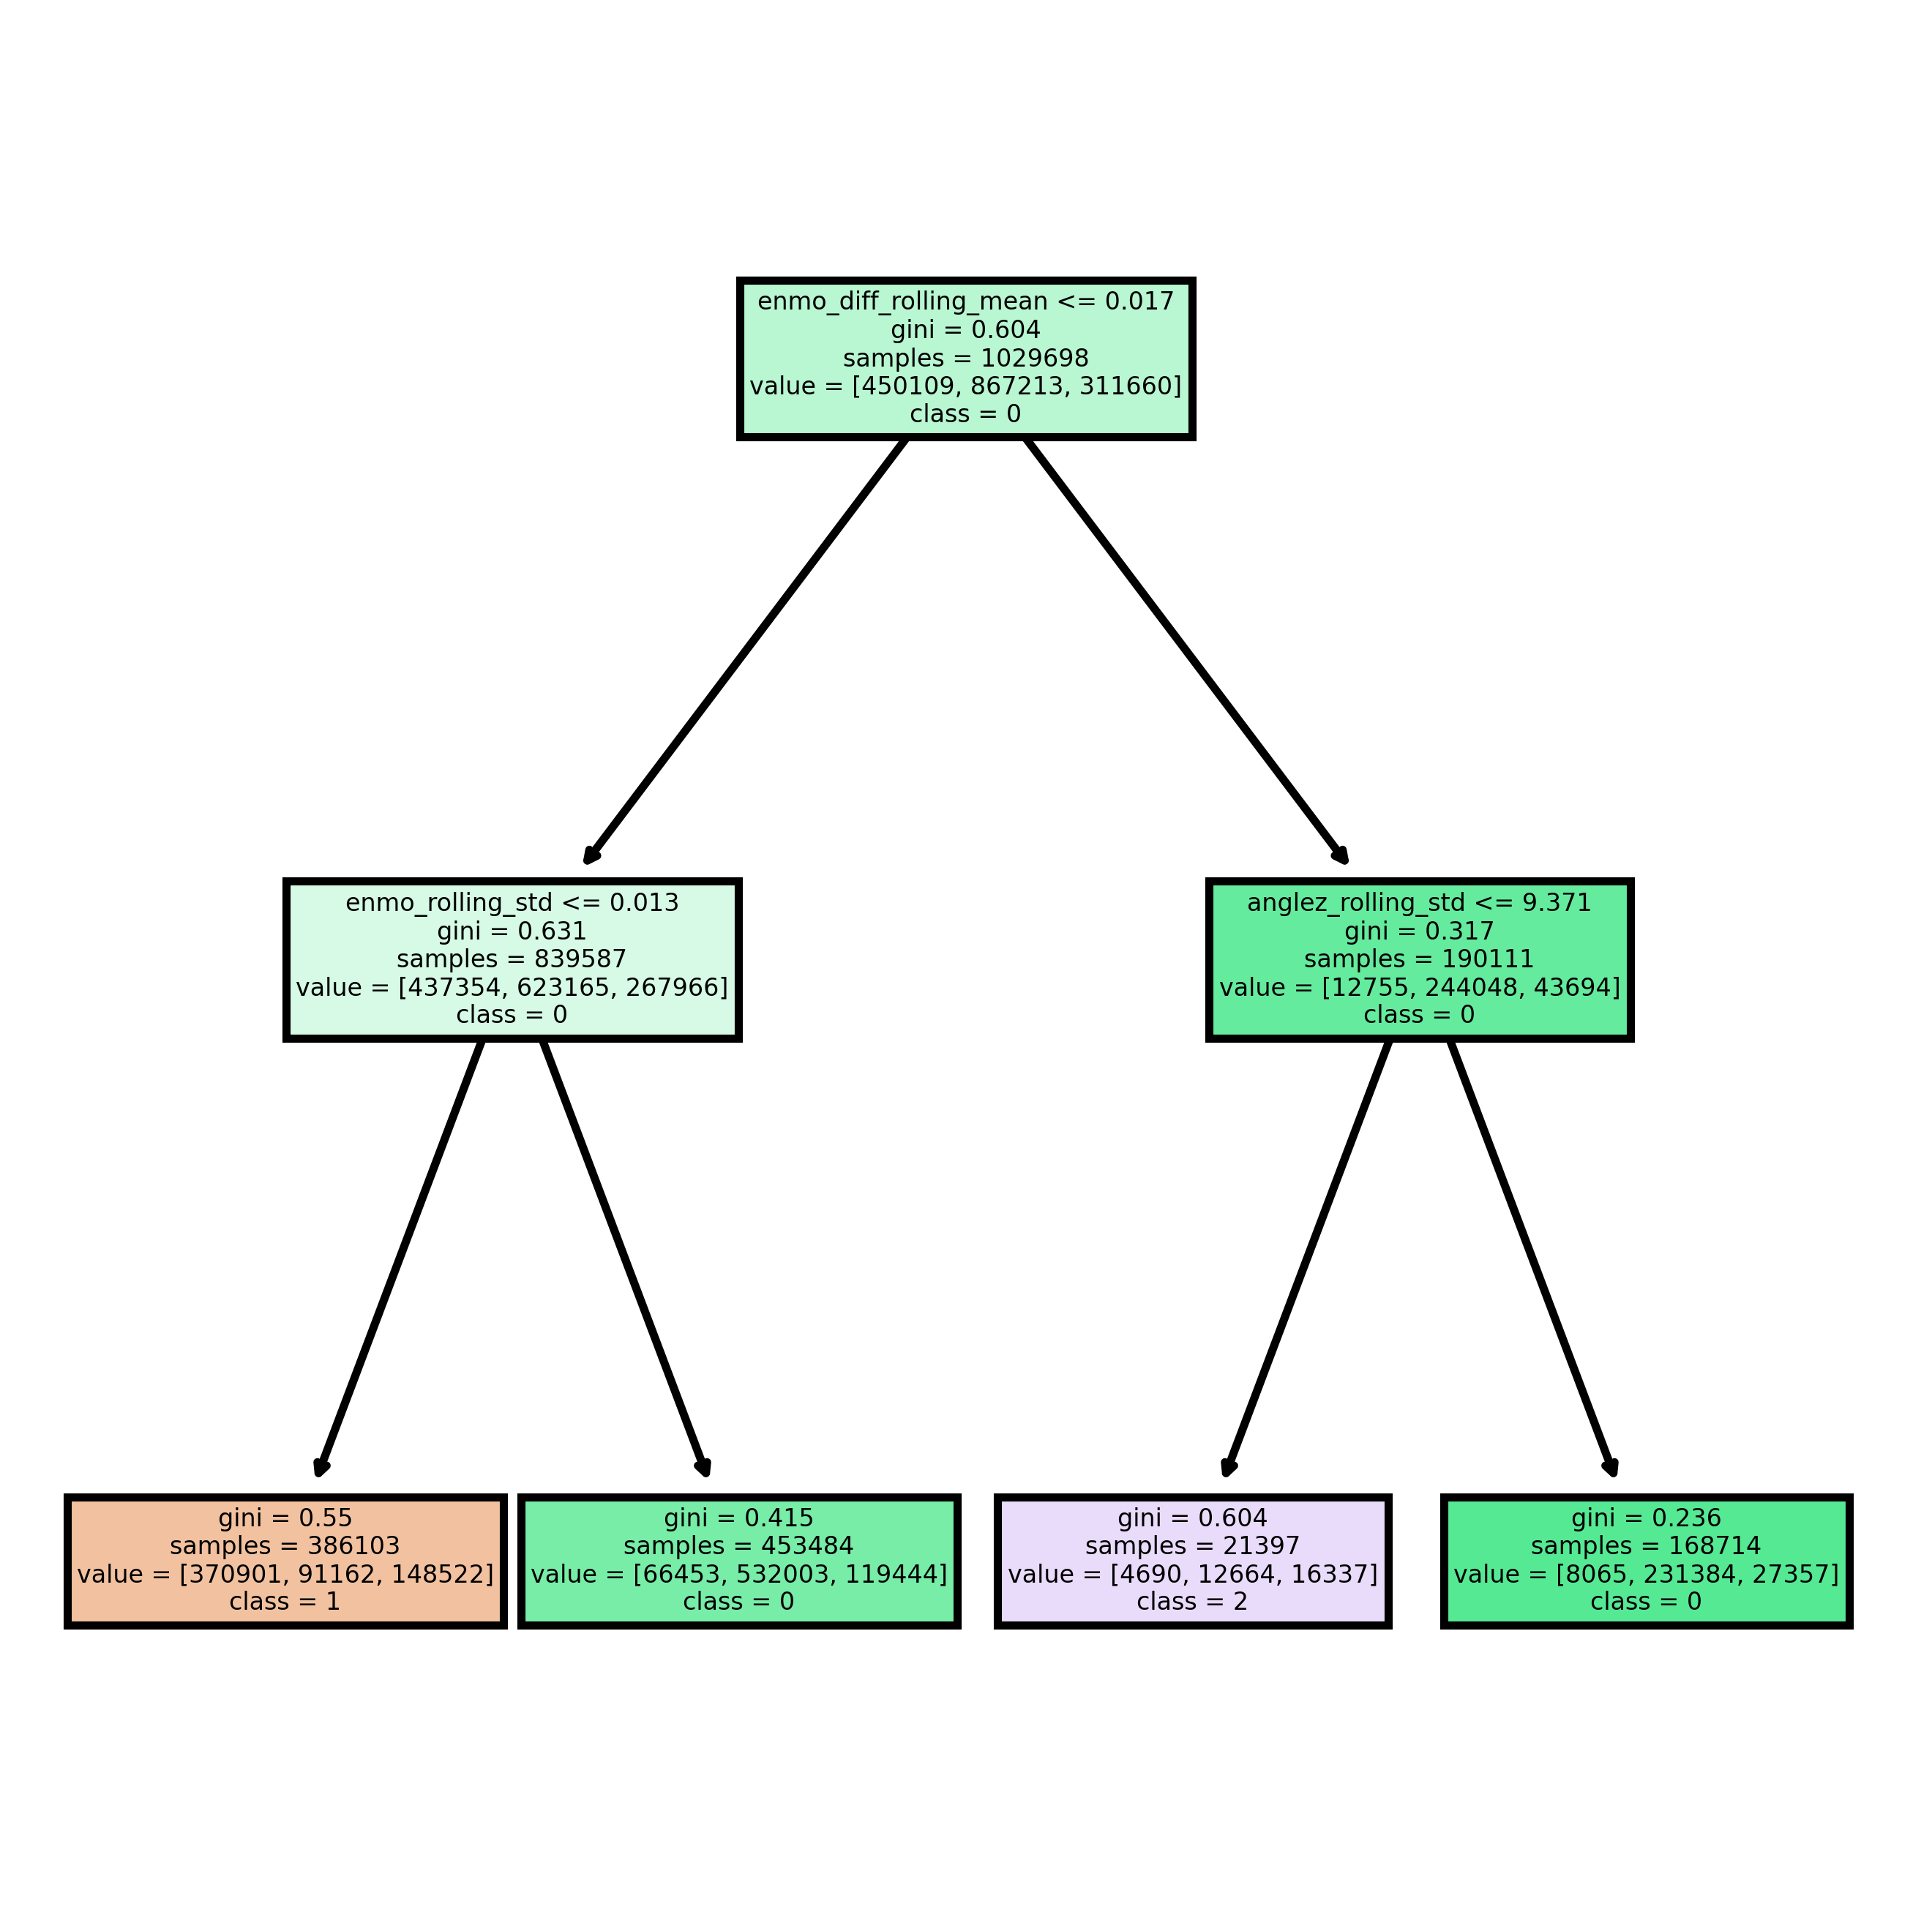

In [ ]:
from sklearn import tree
fn=list(X_train.columns)
cn= list(y_train.unique().astype(str))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.patch.set_alpha(0)
fig.savefig('rf_individualtree.png', transparent= True)

In [ ]:
cn

array(['1', '0', '2'], dtype='<U21')

In [ ]:
y_train.unique()

array([1, 0, 2])

In [ ]:
fn=list(X_train.columns)
cn= list(y_train.unique().astype(str))
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (40,10), dpi = 450)
for index in range(0, 3):
    tree.plot_tree(classifier.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    for line in axes[index].get_lines():
        line.set_color("white")
    axes[index].patch.set_alpha(0)
    axes[index].title.set_color("white")
    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 30)
fig.savefig('rf_5trees.png', transparent=True)

In [ ]:
import cv2
type(cv2.imread("/Users/thomaswynn/Desktop/sleep_kaggle/rf_1.png"))

numpy.ndarray

In [ ]:
import graphviz
dot_data = tree.export_graphviz(classifier.estimators_[0], out_file=None, 
                                feature_names = list(X_train.columns),
                                class_names = list(y_train.name),
                                filled=True, rounded=True)
dot_data = dot_data.replace(
    'digraph Tree {', 
    'digraph Tree { size="10,30"; graph [ratio=0.8, overlap=true]; node [shape=box, width=1]; edge [color=white, arrowhead=vee];'
)
dot_data = dot_data.replace('node [shape=box, width=1];',
                           'node [shape=box, width="1", height="1"];')
graph = graphviz.Source(dot_data) 
graph.view()

'Source.gv.pdf'

In [ ]:
from pydotplus 
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (300, 100))
for index in range(0, 3):
    dot_data = tree.export_graphviz(classifier.estimators_[index], out_file=None, 
                            feature_names=list(X_train.columns),
                            class_names=list(y_train.name),
                            filled=True, rounded=True)

    # Additional attributes for adjusting size, ratio, text box width, and edge properties
    dot_data = dot_data.replace(
        'digraph Tree {', 
        'digraph Tree { size="10,30"; graph [ratio=0.8, overlap=false]; node [shape=box, width=1]; edge [color=white, arrowhead=vee];'
    )

    # Creating the graph and adding it to a subplot

    graph = graphviz.Source(dot_data, format='png')  # Change 'png' to the desired format
    # graph.render(f"your_tree{index}")  # This will save the tree visualization to a file
    # img = plt.imread(f"your_tree{index}.png")  # Read the saved image
    # ax[index].imshow(img)
    # ax[index].axis('off')
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
plt.show()

ImportError: cannot import name 'Image' from 'pydotplus' (/Users/thomaswynn/miniconda/envs/datavis/lib/python3.11/site-packages/pydotplus/__init__.py)

RandomForestClassifier(max_depth=5, min_samples_leaf=300, n_estimators=5,
                       n_jobs=-1, random_state=42)

In [ ]:
import dtreeviz
dtreeviz.__version__

'2.2.2'

In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [ ]:
train.dtypes

series_id                           object
step                                 Int32
timestamp                   datetime64[ns]
anglez                             float32
enmo                               float32
awake                                int64
hour                                 int64
anglez_diff                        float16
enmo_diff                          float16
anglez_rolling_mean                float16
enmo_rolling_mean                  float16
anglez_rolling_max                 float16
enmo_rolling_max                   float16
anglez_rolling_std                 float16
enmo_rolling_std                   float16
anglez_diff_rolling_mean           float16
enmo_diff_rolling_mean             float16
anglez_diff_rolling_max            float16
enmo_diff_rolling_max              float16
dtype: object

In [ ]:
tf.int32

tf.int32

In [ ]:
train.step = train.step.apply(lambda x : tf.cast(x , tf.int32))
train.awake = train.awake.apply(lambda x : tf.cast(x , tf.int32))
train.hour = train.hour.apply(lambda x : tf.cast(x , tf.int32))

In [ ]:
train_ds

<_PrefetchDataset element_spec=({'series_id': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'step': TensorSpec(shape=(None,), dtype=tf.uint32, name=None), 'anglez': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'enmo': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'hour': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'anglez_diff': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'enmo_diff': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'anglez_rolling_mean': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'enmo_rolling_mean': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'anglez_rolling_max': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'enmo_rolling_max': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'anglez_rolling_std': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'enmo_rolling_std': TensorSpec(shape=(None,), dtype=tf.float16, name=None), 'anglez_diff_rolling_mean': TensorSpec(s

In [ ]:
cmodel = tfdf.keras.RandomForestModel(verbose=0, random_seed=1234)
cmodel.fit((train))

NameError: name 'train' is not defined

In [ ]:
viz_cmodel = dtreeviz.model(classifier,
                            tree_index=0,
                            X_train=X_train,
                            y_train=y_train,
                            feature_names=list(X_train.columns), 
                            target_name = list(y_train.name),
                            class_names=list(y_train.name))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/thomaswynn/miniconda/envs/datavis/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/xg/13297k394gq4_7ph8q_5jckh0000gn/T/ipykernel_36002/392022450.py", line 1, in <module>
    viz_cmodel = dtreeviz.model(classifier,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/thomaswynn/miniconda/envs/datavis/lib/python3.11/site-packages/dtreeviz/trees.py", line 1914, in model
  File "/Users/thomaswynn/miniconda/envs/datavis/lib/python3.11/site-packages/dtreeviz/models/shadow_decision_tree.py", line 466, in get_shadow_tree
    elif str(type(tree_model)).endswith("xgboost.core.Booster'>"):
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Tree model must be in (DecisionTreeRegressor, DecisionTreeClassifier, xgboost.core.Booster, lightgbm.basic.Booster, pyspark DecisionTreeClassificationModel, pyspark D

In [ ]:
from dtreeviz import *
viz = dtreeviz(classifier.estimators_[0], X_train, y_train, feature_names=list(X_train.columns), class_names=list(y_train.name))
viz.view()


TypeError: 'int' object is not subscriptable